# Normal Distribution Project

This repository contains my investigation of normal distribution as part of the Fundamentals of Data Assessment module of the Higher Diploma in Computing and Data Analytics at GMIT.

## Table of Contents
1. [Introduction](#introduction)
2. [Characteristics of the Normal Distribution](#characteristics)
3. [Significance & Application of the the Normal Distribution](#significance_application)
4. [The Empirical Rule](#empirical)
5. [Limitations of a Bell Curve](#limitations)
6. [Derivative Distributions](#derivatives)
7. [Conclusion](#conclusion)
8. [Summary](#summary)

## 1. Introduction <a class="anchor" id="introduction"></a>

The normal distribution was first described in 1809 by Carl Gauss in the context of measurement errors in astronomy.  Since then it has been used and applied extensively in relation to probability, statistics and machine learning.  It is the default probability for many real-world scenarios and is widely used because many phenomena found in nature fall into this predictable pattern and it can be effectively modeled by relatively simple functions.  In this notebook I will look at the features, significance and application of the normal distribution.  

## 2. Characteristics of the Normal Distribution <a class="anchor" id="characteristics"></a>

Normal distributions share the following characteristics:

* **the mean, median and mode are equal**
The mean is the numerical average of a data set, the mode is the value that appears most frequently and the median is the middle number.  In a normal distribution the top of the curve represents all three of these values and they are equal. 

* **it is symmetrical**
A normal distribution has a distinctive symmetrical bell shape and is often called a bell curve for this reason.  This curve can be divided in the middle to produce two equal and symmetrical halves; the right side of the center is a mirror image of the left side.

* **it is unimodal**
There is only one mode, or peak, in a normal distribution. 

* **it is asymptotic**
Normal distributions are continuous and have tails that are asymptotic. Continuous variables, as opposed to discrete variables which have finite values, can take on an unlimited number of values between the lowest and highest points of measurement.  Asymptotic means that the tails of the distribution never intersect with the X axis.

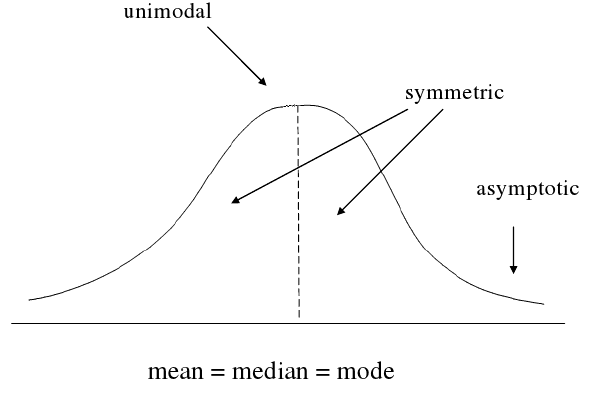

## 3. Significance and Application of the Normal Distribution <a class="anchor" id="significance_application"></a>

Normal distribution is considered one of the most important probability distributions in statistics because it accurately describes the distribution of values for many real-world, natural phenomena, prime examples being height, weight, shoe size, IQ and life expectancy in a population. Fundamental to understanding the importance of the normal distribution is the Central Limit Theorem which holds that given a sufficiently large sample size (equal to or greater than 30), when the independent random variables are summed, the aggregate of those variables will tend toward a normal distribution even if the original variables themselves are not normally distributed.  


A normal distribution can take on any value as its mean and standard deviation. The Standard Normal Distribution is a specific instance of the Normal Distribution that has a mean of ‘0’ and a standard deviation of ‘1’. Standardising a normal distribution allows for easy calculation of the probability of certain values occurring in a distribution and to compare data sets which otherwise would have different means and standard deviations.

### Modelling a Simple Probability Distribution

Below is the code for a simple probability distribution plot representing standard normal distribution with a mean of 0 and a standard deviation of 1 in the range of -4 to 4. It illustrates the classic bell curve shape. 

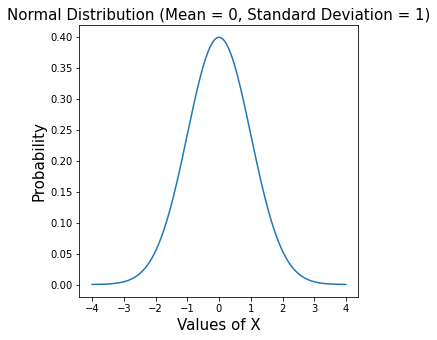

In [1]:
# Create a normal distribution with mean 0 and standard deviation 1

import numpy as np   #for math operations
import matplotlib.pyplot as plt   #to generate a plot
from scipy.stats import norm   #to generate normal distribution

# Plot between -4 and 4 with .01 steps
x_axis = np.arange(-4, 4, .01)

plt.figure(figsize=(5, 5))

# Mean = 0, SD = 1
plt.plot(x_axis, norm.pdf(x_axis, 0, 1))
plt.title('Normal Distribution (Mean = 0, Standard Deviation = 1)', fontsize='15')
plt.xlabel('Values of X', fontsize='15')
plt.ylabel('Probability', fontsize='15')
plt.show()


I found the below simple [code](https://vitalflux.com/normal-distribution-explained-python-examples/) gave a great visual to demonstrate  how the shape of the curve varies depending on the mean and standard deviations when plotting multiple normal distributions.  Clearly the higher the standard deviation, the shallower the resultant curve.

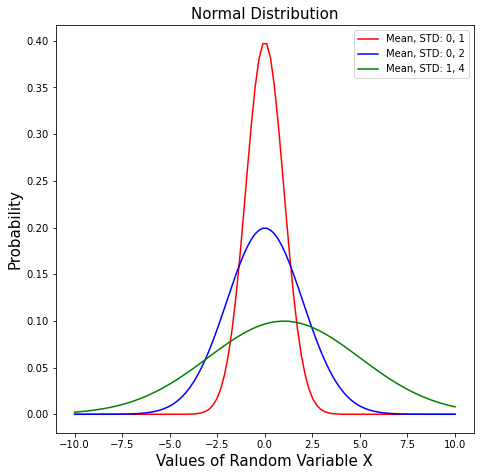

In [2]:
# Values of random variable
from scipy import stats


x = np.linspace(-10, 10, 100)
plt.figure(figsize=(7.5,7.5))

plt.plot(x, stats.norm(0, 1).pdf(x), color='r', label='Mean, STD: 0, 1')
plt.plot(x, stats.norm(0, 2).pdf(x), color='b', label='Mean, STD: 0, 2')
plt.plot(x, stats.norm(1, 4).pdf(x), color='g', label='Mean, STD: 1, 4')

plt.xlim(-11, 11)
plt.title('Normal Distribution', fontsize='15')
plt.xlabel('Values of Random Variable X', fontsize='15')
plt.ylabel('Probability', fontsize='15')

plt.legend()
plt.show()

### Coding a Real Example

To illustrate a simple example of calculating probabilities from normal distribution I'll use the average IQ in Ireland which is 100 with a standard deviation of 15, generate a random data set of 1000 values and plot this into a histogram with a standard deviation line plotted over it, illustrating how it takes on the classic shape of a bell curve. 

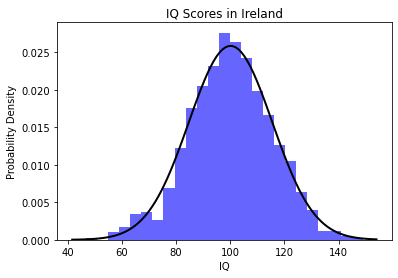

In [3]:
# code taken from and modified - https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/ 
#import libraries

from scipy.stats import norm
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Generating random data set for IQs with 1000 values
data = np.random.normal(100, 15, 1000)
  
# Plotting the histogram
plt.hist(data, bins=25, density=True, alpha=0.6, color='b')

#fitting a normal distribution to the data set
mu, std = norm.fit(data) 

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
  
plt.plot(x, p, 'k', linewidth=2)
plt.title("IQ Scores in Ireland")
plt.xlabel('IQ')
plt.ylabel('Probability Density')
  
plt.show()


I'd like to show the standard deviation lines on my plot so I'm going to use instead a kernel density estimate (KDE) plot.  A KDE is analogous to a histogram but represents the data using a continuous probability density curve in one or more dimensions.

Onto this I will map one standard deviation to either side of the mean and then check that these values correspond with the empirical rule.  

<AxesSubplot:ylabel='Density'>

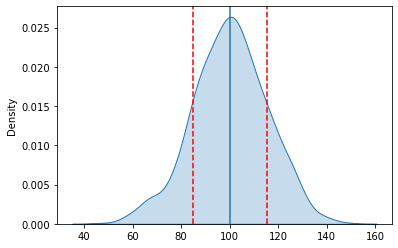

In [12]:
data_mean = data.mean()
data_std = data.std()

plt.axvline(data_mean)
plt.axvline(data_mean - data_std, ls="--", color = "r")
plt.axvline(data_mean + data_std, ls="--", color = "r")
sns.kdeplot((data), fill=True)


Now using the normal distribution, I'd like know what percentage of the population has an IQ of 130 or higher.  The code below first calculates the cumulative probability value from -∞ to 130 and we then subtract that figure from 1 (because this is the total value of the area under the curve). The resulting remainder represents the % of population that has an IQ of 130 or higher or as the calculation shows, approximately 2.28% of the population.  

In [5]:
cdf_value = norm(loc = 100 , scale = 15).cdf(130)
prob = 1 - cdf_value
print(prob)


0.02275013194817921


## 4. The Empirical Rule <a class="anchor" id="empirical"></a>

The empirical rule states that in a normal distribution, almost all observed data will fall within three standard deviations of the mean.  Specifically that 68% of observations fall within the first standard deviation, 95% within the first two standard deviations and 99.7% within the first three standard deviations which is why it is also sometimes referred to as the (less catchy!) 68-95-99.7 rule or the three-sigma rule. 

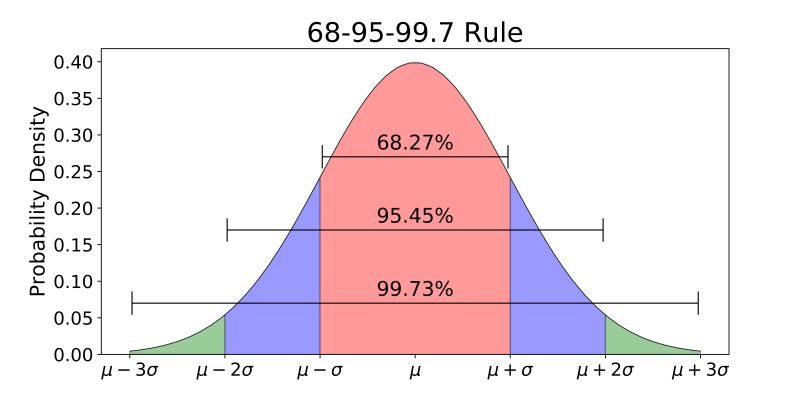

### References

https://www.investopedia.com/terms/n/normaldistribution.asp#:~:text=Normal%20distribution%2C%20also%20known%20as,data%20far%20from%20the%20mean - visited 03/10/2022

McLeod, S. A. (2019, May 28). Introduction to the normal distribution (bell curve). Simply psychology: https://www.simplypsychology.org/normal-distribution.html visited 03/10/2022

https://vitalflux.com/normal-distribution-explained-python-examples/ - visited 12/10/2022

https://www.askpython.com/python/normal-distribution - visited 12/10/2022

Video: https://www.youtube.com/watch?v=HfHOanDNWbg The normal distribution in Python, pysce, John Kitchin - viewed 24/10/2022

Article on The Normal Distribution, published in The Chemometrics Column 25 June 2014, author Richard G. Brereton https://analyticalsciencejournals.onlinelibrary.wiley.com/doi/pdf/10.1002/cem.2655#:~:text=The%20normal%20(or%20Gaussian)%20distribution,of%20applied%20probability%20and%20statistics - visited 24/10/2022

https://www.quora.com/Why-is-the-normal-distribution-important - visited 25/10/2022

https://study.com/academy/lesson/normal-distribution-of-data-examples-definition-characteristics.html#:~:text=Characteristics%20of%20Normal%20Distribution&text=Normal%20distributions%20are%20symmetric%2C%20unimodal,image%20of%20the%20left%20side - visited 25/10/2022

https://www.investopedia.com/terms/c/central_limit_theorem.asp visited 25/10/2022

https://en.wikipedia.org/wiki/Central_limit_theorem - visited 06/11/2022

https://www.geeksforgeeks.org/how-to-plot-normal-distribution-over-histogram-in-python/ - visited 06/11/2022

https://www.investopedia.com/terms/e/empirical-rule.asp#:~:text=Key%20Takeaways,standard%20deviations%20from%20the%20mean. - visited 06/11/2022

https://builtin.com/data-science/empirical-rule - visited 06/11/2022

video: Python Statistics - Normal Distribution and Probability Functions by Absent Data https://youtu.be/WWTf5J5NDfQ